In [ ]:
# !pip install arviz -q #==0.6.1
# !pip install Theano==1.0.5 -q
# !pip install pymc3==3.9.3 -q

!pip install arviz==0.6.1 -q
!pip install pymc3==3.8 -q
!pip install Theano==1.0.4 -q

     |████████████████████████████████| 1.4MB 6.0MB/s 
     |████████████████████████████████| 4.7MB 38.0MB/s 
     |████████████████████████████████| 317kB 47.6MB/s 
     |████████████████████████████████| 911kB 4.1MB/s 
     |████████████████████████████████| 2.8MB 5.7MB/s 


In [ ]:
import numpy as np
import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
import scipy.stats as stats
import arviz as az

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.8
Running on ArviZ v0.6.1


In [ ]:
lambdaALCK_array0 = -1*np.array([[-0.014657,-0.014447,-0.014664,-0.015526,-0.01714,-0.022992,-0.034524,-0.070557,-0.11387,-0.20832,-0.01],
[-0.012456,-0.012384,-0.013487,-0.013015,-0.01379,-0.018903,-0.03389,-0.052318,-0.093198,-0.15276,-0.01],
[-0.0098342,-0.0096907,-0.0098001,-0.010041,-0.011918,-0.017406,-0.026369,-0.039222,-0.057673,-0.11743,-0.01],
[-0.0080017,-0.0077559,-0.0076087,-0.0082535,-0.0099144,-0.012286,-0.01889,-0.03604,-0.054248,-0.095491,-0.01],
[-0.0058524,-0.0056572,-0.0072154,-0.0066482,-0.0078467,-0.010037,-0.014898,-0.028174,-0.04584,-0.071974,-0.01],
[-0.0046865,-0.0047947,-0.0044626,-0.0045893,-0.0049986,-0.0081368,-0.014763,-0.019339,-0.035599,-0.060622,-0.01],
[-0.0036558,-0.0031606,-0.0036487,-0.0046674,-0.0031157,-0.0048789,-0.011206,-0.019952,-0.028773,-0.07807,-0.01],
[-0.0024369,-0.0024442,-0.0025014,-0.0024395,-0.0035739,-0.0049891,-0.0062023,-0.010665,-0.018304,-0.029732,-0.01],
[-0.0016189,-0.0017432,-0.0013415,-0.0026006,-0.0021152,-0.0028547,-0.0089079,-0.0074472,-0.017615,-0.024174,-0.01],
[-0.0013258,-0.00074239,-0.00067486,-0.0013035,-0.0019591,-0.0021911,-0.0065414,-0.0074576,-0.016519,-0.65039,-0.01],
[-0.00060974,-0.00027457,-0.00018559,-0.00016811,-0.00085357,-0.0020511,-0.0026312,-0.0053513,-0.038536,-0.014071,-0.01],
[-0.00052181,-0.00050238,-0.00016453,-0.00011248,-0.00068145,-0.00015995,-0.0014959,-0.0041252,-0.0048673,-0.0055963,-0.01],
[-7.0125e-05,-0.00049168,-0.00062104,-0.00094581,-6.2083e-05,-0.0002202,-0.00032468,-0.0053617,-0.01093,-0.01741,-0.01]])

lambdaALCK_array = lambdaALCK_array0[:,:-1]

# np.save("model2_evidence_lambdaALCK", lambdaALCK_array)
# from google.colab import files
# files.download("model2_evidence_lambdaALCK.npy") # Download locally from colab

In [ ]:
decaylengthALCK_array = 1/lambdaALCK_array

In [ ]:
N_Diff = lambdaALCK_array.shape[0]
N_Poff = lambdaALCK_array.shape[0]

logDiff = np.arange(-3, 0.25, 0.25); print(['logDiff.shape =',logDiff.shape])
logPoff = np.arange(-5, 0.0, 0.5); print(['logPoff.shape =',logPoff.shape])

logPoff_array, logDiff_array  = np.meshgrid(logPoff, logDiff)


['logDiff.shape =', (13,)]
['logPoff.shape =', (10,)]


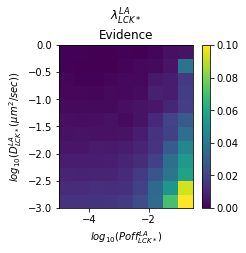

In [ ]:
# plot input data


fig, ax0 = plt.subplots(figsize=[3, 3])
vmin0 = 0; vmax0 = 0.1 #150
im0 = ax0.pcolor(logPoff, logDiff, lambdaALCK_array, vmin=vmin0, vmax=vmax0)
# ax0[0].contour(log_Poff_array, log_Diff_array, lambda_aLCK_array, \
#    vmin=vmin0, vmax=vmax0, colors='w')
# im0 = ax0.pcolor(logPoff, logDiff, decaylengthALCK_array)
# ax0.contour(logPoff, logDiff, decaylengthALCK_array, colors='w')
fig.colorbar(im0, ax=ax0)
ax0.set_title('$\lambda_{LCK*}^{LA}$ \nEvidence')
ax0.set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax0.set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)');

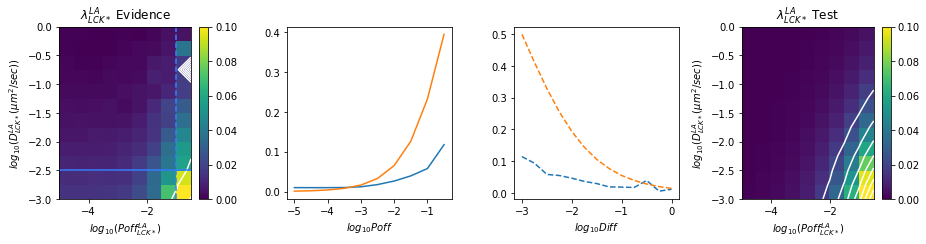

In [ ]:
Diff_ind = 2
Poff_ind = 8


# min1 = 0
maxPoff = 1.2 #0.3
cenPoff = -0.0
devPoff = 0.7
sigPoff = maxPoff/(1 + np.exp(-(logPoff - cenPoff)/devPoff))
sigPoff_array = maxPoff/(1 + np.exp(-(logPoff_array - cenPoff)/devPoff))

# min2 = 0
maxDiff = 1.0 #0.2
cenDiff = -3
devDiff = -0.7
sigDiff = maxDiff/(1 + np.exp(-(logDiff - cenDiff)/devDiff))
sigDiff_array = maxDiff/(1 + np.exp(-(logDiff_array - cenDiff)/devDiff))

test_array = sigPoff_array * sigDiff_array


fig, ax1 = plt.subplots(1,4, figsize=[13, 3.5])
vmin0 = 0
vmax0 = 0.1
im0 = ax1[0].pcolor(logPoff, logDiff, lambdaALCK_array, vmin=vmin0, vmax=vmax0)
ax1[0].contour(logPoff, logDiff, lambdaALCK_array, colors='w', vmin=vmin0, vmax=vmax0)
fig.colorbar(im0, ax=ax1[0])
ax1[0].plot([-5, -0.5],[logDiff[Diff_ind], logDiff[Diff_ind]],'-', color=[0.2, 0.5, 1.0])
ax1[0].plot([logPoff[Poff_ind], logPoff[Poff_ind]],[-3, 0],'--', color=[0.2, 0.5, 1.0])
ax1[0].set_title('$\lambda_{LCK*}^{LA}$ Evidence')
ax1[0].set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax1[0].set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)');

ax1[1].plot(logPoff, lambdaALCK_array[Diff_ind,:])
ax1[1].plot(logPoff, sigPoff)
ax1[1].set_xlabel('$log_{10}Poff$')

ax1[2].plot(logDiff, lambdaALCK_array[:,Poff_ind],'--')
ax1[2].plot(logDiff, sigDiff,'--')
ax1[2].set_xlabel('$log_{10}Diff$')

im3 = ax1[3].pcolor(logPoff, logDiff, test_array, vmin=vmin0, vmax=vmax0) #, vmin=vmin0, vmax=vmax0
ax1[3].contour(logPoff, logDiff, test_array,colors='w', vmin=vmin0, vmax=vmax0)
fig.colorbar(im3, ax=ax1[3])
ax1[3].set_title('$\lambda_{LCK*}^{LA}$ Test')
ax1[3].set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax1[3].set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)');

plt.tight_layout()

In [ ]:
        # maxDiff:
        mu_rv_maxDiff_lambdaALCK_LA2 = 1.0
        sd_rv_maxDiff_lambdaALCK_LA2 = 0.3
        lower_rv_maxDiff_lambdaALCK_LA2 = 0.0
        upper_rv_maxDiff_lambdaALCK_LA2 = None
        
        # center_logDiff:
        mu_rv_center_logDiff_lambdaALCK_LA2 = -3.0
        sd_rv_center_logDiff_lambdaALCK_LA2 = 0.5
        
        # devisor_logDiff:
        mu_rv_devisor_logDiff_lambdaALCK_LA2 = -0.7
        sd_rv_devisor_logDiff_lambdaALCK_LA2 = 0.3
        lower_rv_devisor_logDiff_lambdaALCK_LA2 = None
        upper_rv_devisor_logDiff_lambdaALCK_LA2 = 0

        # maxPoff:
        mu_rv_maxPoff_lambdaALCK_LA2 = 1.0
        sd_rv_maxPoff_lambdaALCK_LA2 = 0.3
        lower_rv_maxPoff_lambdaALCK_LA2 = 0.0
        upper_rv_maxPoff_lambdaALCK_LA2 = None

        # center_logPoff:
        mu_rv_center_logPoff_lambdaALCK_LA2 = 0
        sd_rv_center_logPoff_lambdaALCK_LA2 = 1.0
        
        # devisor_logPoff:
        mu_rv_devisor_logPoff_lambdaALCK_LA2 = 0.5
        sd_rv_devisor_logPoff_lambdaALCK_LA2 = 0.2
        lower_rv_devisor_logPoff_lambdaALCK_LA2 = 0
        upper_rv_devisor_logPoff_lambdaALCK_LA2 = None

        # noise:
        sd_noise_lambdaALCK_LA2 = 0.2

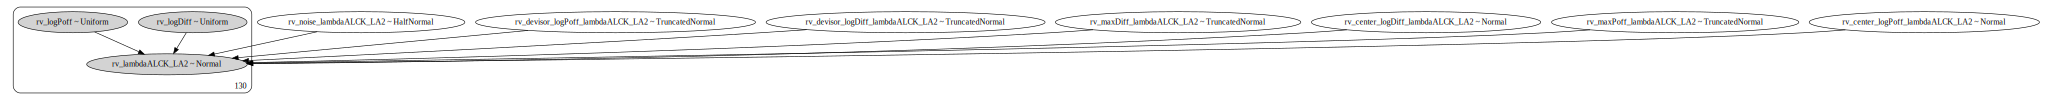

In [ ]:
### model2 - LA (LCK activation) ####################################
def get_model2_untrained(logDiff_array, logPoff_array, lambdaALCK_array):
    '''
    TODO: add proper documentation
    '''
    model2 = pm.Model()
    with model2:
        # dw_aLCK_LA ########################################################
        # describing the behaviour of the distribution width (dw) of aLCK
        logDiff_obs = logDiff_array.reshape(-1) 
        logPoff_obs = logPoff_array.reshape(-1)
        lambdaALCK_obs = lambdaALCK_array.reshape(-1)
        
        rv_logDiff = pm.Uniform('rv_logDiff', -3, 0, observed=logDiff_obs)
        rv_logPoff = pm.Uniform('rv_logPoff', -5, 0, observed=logPoff_obs)

        # maxDiff lambdaALCK:
        rv_maxDiff_lambdaALCK_LA2 = \
            pm.TruncatedNormal('rv_maxDiff_lambdaALCK_LA2',
                                mu = mu_rv_maxDiff_lambdaALCK_LA2,
                                sd = sd_rv_maxDiff_lambdaALCK_LA2,
                                lower = lower_rv_maxDiff_lambdaALCK_LA2,
                                upper = upper_rv_maxDiff_lambdaALCK_LA2)
        
        # center_logDiff:
        rv_center_logDiff_lambdaALCK_LA2 = \
            pm.Normal('rv_center_logDiff_lambdaALCK_LA2',
                    mu = mu_rv_center_logDiff_lambdaALCK_LA2, 
                    sd = sd_rv_center_logDiff_lambdaALCK_LA2)

        # devisor_logDiff:
        rv_devisor_logDiff_lambdaALCK_LA2 = \
            pm.TruncatedNormal('rv_devisor_logDiff_lambdaALCK_LA2',
                                mu = mu_rv_devisor_logDiff_lambdaALCK_LA2, 
                                sd = sd_rv_devisor_logDiff_lambdaALCK_LA2,
                                lower = lower_rv_devisor_logDiff_lambdaALCK_LA2,
                                upper = upper_rv_devisor_logDiff_lambdaALCK_LA2)
        
        # maxPoff:
        rv_maxPoff_lambdaALCK_LA2 = \
            pm.TruncatedNormal('rv_maxPoff_lambdaALCK_LA2',
                                mu = mu_rv_maxPoff_lambdaALCK_LA2,
                                sd = sd_rv_maxPoff_lambdaALCK_LA2,
                                lower = lower_rv_maxPoff_lambdaALCK_LA2,
                                upper = upper_rv_maxPoff_lambdaALCK_LA2)
        
        # center_logPoff:
        rv_center_logPoff_lambdaALCK_LA2 = \
            pm.Normal('rv_center_logPoff_lambdaALCK_LA2',
                    mu = mu_rv_center_logPoff_lambdaALCK_LA2, 
                    sd = sd_rv_center_logPoff_lambdaALCK_LA2)
         
        # devisor_logPoff:
        rv_devisor_logPoff_lambdaALCK_LA2 = \
            pm.TruncatedNormal('rv_devisor_logPoff_lambdaALCK_LA2',
                                mu = mu_rv_devisor_logPoff_lambdaALCK_LA2,
                                sd = sd_rv_devisor_logPoff_lambdaALCK_LA2,
                                lower = lower_rv_devisor_logPoff_lambdaALCK_LA2,
                                upper = upper_rv_devisor_logPoff_lambdaALCK_LA2)

        # noise:
        rv_noise_lambdaALCK_LA2 = \
            pm.HalfNormal('rv_noise_lambdaALCK_LA2',
                        sd = sd_noise_lambdaALCK_LA2)

        # exponent of logDiff sigmoid:
        rv_tmp_x1 = (rv_logDiff - rv_center_logDiff_lambdaALCK_LA2)/\
            rv_devisor_logDiff_lambdaALCK_LA2

        # logDiff sigmoid:
        rv_tmp_sig1 = rv_maxDiff_lambdaALCK_LA2/(1 + np.exp(-rv_tmp_x1))
        
        # exponent of logPoff sigmoid:
        rv_tmp_x2 = (rv_logPoff - rv_center_logPoff_lambdaALCK_LA2)/\
            rv_devisor_logPoff_lambdaALCK_LA2

        # logPoff sigmoid:
        rv_tmp_sig2 = rv_maxPoff_lambdaALCK_LA2/(1 + np.exp(-rv_tmp_x2))

        # lambdaALCK:
        rv_lambdaALCK_LA2 = \
            pm.Normal('rv_lambdaALCK_LA2', 
            mu = rv_tmp_sig1*rv_tmp_sig2,
            sd=rv_noise_lambdaALCK_LA2, 
            observed=lambdaALCK_obs)
        
    return model2    

model2 = get_model2_untrained(logDiff_array, logPoff_array, lambdaALCK_array)
gv2 = pm.model_to_graphviz(model2)
gv2

In [ ]:
# from google.colab import files
# gv2.render("model2_graph", format="png")
# files.download("model2_graph.png") # Download locally from colab

In [ ]:
with model2:
    trace2 = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_noise_lambdaALCK_LA2, rv_devisor_logPoff_lambdaALCK_LA2, rv_center_logPoff_lambdaALCK_LA2, rv_maxPoff_lambdaALCK_LA2, rv_devisor_logDiff_lambdaALCK_LA2, rv_center_logDiff_lambdaALCK_LA2, rv_maxDiff_lambdaALCK_LA2]
Sampling chain 3, 0 divergences: 100%|██████████| 2500/2500 [00:14<00:00, 173.12it/s]


In [ ]:
pm.traceplot(trace2);

Once the 'trace' is given, its 'summary' can be saved and all following operations can be done on the saved 'trace_summary', (trace_summary = pm.summary(trace)).

In [ ]:
trace2_summary = pm.summary(trace2).round(3) # var_names=["mu", "tau"]
trace2_summary.to_pickle('trace2_summary')
if True: # False
    files.download("trace2_summary") 
!ls

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

model2_trained_lambdaALCK_LA2_mean.npy	sample_data
model2_trained_lambdaALCK_LA2_std.npy	trace2_summary


Read from saved (pickled) trace summary. 
Getting 'mean' and 'sd' values from 'trace_summary':

In [ ]:
# r = read, to distinguish between the original and the saved files.
trace2_summary_r = pd.read_pickle('trace2_summary') 

# displaying the rv names and the data of intersest: 'mean' and 'sd':
mean_sd_r = trace2_summary_r.loc[:, ['mean','sd']]
mean_sd_r

,mean,sd
rv_center_logDiff_lambdaALCK_LA2,-2.743,0.501
rv_center_logPoff_lambdaALCK_LA2,-0.103,0.424
rv_maxDiff_lambdaALCK_LA2,1.026,0.280
rv_devisor_logDiff_lambdaALCK_LA2,-1.209,0.218
rv_maxPoff_lambdaALCK_LA2,1.027,0.281
rv_devisor_logPoff_lambdaALCK_LA2,0.600,0.136
rv_noise_lambdaALCK_LA2,0.055,0.003


Validation:

In [ ]:
# exponent of logDiff sigmoid:
rv_tmp_x1_post = (logDiff_array - trace2_summary_r.loc['rv_center_logDiff_lambdaALCK_LA2','mean'])/\
                                  trace2_summary_r.loc['rv_devisor_logDiff_lambdaALCK_LA2','mean']

# logDiff sigmoid:
rv_tmp_sig1_post = trace2_summary_r.loc['rv_maxDiff_lambdaALCK_LA2','mean']/\
    (1 + np.exp(-rv_tmp_x1_post))

# exponent of logPoff sigmoid:
rv_tmp_x2_post = (logPoff_array - trace2_summary_r.loc['rv_center_logPoff_lambdaALCK_LA2','mean'])/\
                                  trace2_summary_r.loc['rv_devisor_logPoff_lambdaALCK_LA2','mean']
# logPoff sigmoid:
rv_tmp_sig2_post = trace2_summary_r.loc['rv_maxPoff_lambdaALCK_LA2','mean']/\
    (1 + np.exp(-rv_tmp_x2_post))

# lambdaALCK_validation:
lambdaALCK_validation = rv_tmp_sig1_post*rv_tmp_sig2_post

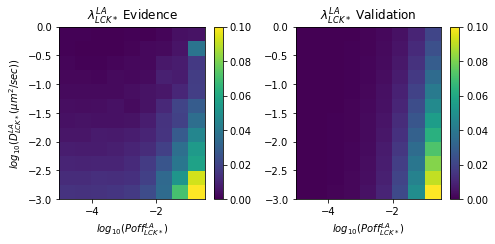

In [ ]:
plot_contours = False
fig, ax0 = plt.subplots(1,2, figsize=[7, 3.5], sharey=True)
vmin0 = 0; vmax0 = 0.1 #150
im0 = ax0[0].pcolor(logPoff, logDiff, lambdaALCK_array, vmin=vmin0, vmax=vmax0)
if plot_contours:
    ax0[0].contour(logPoff, logDiff, lambdaALCK_array, vmin=vmin0, vmax=vmax0, colors='w')

fig.colorbar(im0, ax=ax0[0])
ax0[0].set_title('$\lambda_{LCK*}^{LA}$ Evidence')
ax0[0].set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
ax0[0].set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)')

###
im1 = ax0[1].pcolor(logPoff, logDiff, lambdaALCK_validation)
if plot_contours: 
    ax0[1].contour(logPoff, logDiff, rv_lambdaALCK_validation, 
                   vmin=vmin0, vmax=vmax0, colors='w')

fig.colorbar(im0, ax=ax0[1])
ax0[1].set_title('$\lambda_{LCK*}^{LA}$ Validation')
ax0[1].set_xlabel('$log_{10}(Poff_{LCK*}^{LA}$)')
# ax0[1].set_ylabel('$log_{10}(D_{LCK*}^{LA}(\mu m^2/sec)$)')
###

plt.tight_layout();

Build trained model (with updated parameter estimates through their posteriors):

In [ ]:
def get_model2_trained(trace2, logDiff_obs=None, logPoff_obs=None):
    ''' return model2 trained based on trace2. 
    If observed_t and/or observed_k are specified, 
    return the model conditioned on those values '''
    model2_trained = pm.Model()
    with model2_trained:
        ### model2 - LA (LCK activation) ###########################    
        # random variables x and y
        rv_logDiff = pm.Uniform('rv_logDiff', -3, 0, observed=logDiff_obs)
        rv_logPoff = pm.Uniform('rv_logPoff', -5, 0, observed=logPoff_obs)

        # random variables
        rv_noise_lambdaALCK_LA2 = pm.HalfNormal('rv_noise_lambdaALCK_LA2',
                                             sd=trace2.rv_noise_lambdaALCK_LA2.mean()) # noise 
        # Sigmoid params:
        # Diff sigmoid max:
        rv_maxDiff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_maxDiff_lambdaALCK_LA2', 
                             mu = trace2_summary_r.loc['rv_maxDiff_lambdaALCK_LA2','mean'],
                             sd = trace2_summary_r.loc['rv_maxDiff_lambdaALCK_LA2','sd'],
                             lower = lower_rv_maxDiff_lambdaALCK_LA2,
                             upper = upper_rv_maxDiff_lambdaALCK_LA2)
        
        # Diff sigmoid center:
        rv_center_logDiff_lambdaALCK_LA2 = pm.Normal('rv_center_logDiff_lambdaALCK_LA2',
                           mu = trace2_summary_r.loc['rv_center_logDiff_lambdaALCK_LA2','mean'],
                           sd = trace2_summary_r.loc['rv_center_logDiff_lambdaALCK_LA2','sd'])
        
        # Diff sigmoid devisor:
        rv_devisor_logDiff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_devisor_logDiff_lambdaALCK_LA2',
                                     mu = trace2_summary_r.loc['rv_devisor_logDiff_lambdaALCK_LA2','mean'],
                                     sd = trace2_summary_r.loc['rv_devisor_logDiff_lambdaALCK_LA2','sd'],
                                     lower = lower_rv_devisor_logDiff_lambdaALCK_LA2,
                                     upper = upper_rv_devisor_logDiff_lambdaALCK_LA2)
        
        # Poff sigmoid max:
        rv_maxPoff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_maxPoff_lambdaALCK_LA2', 
                              mu = trace2_summary_r.loc['rv_maxPoff_lambdaALCK_LA2','mean'],
                              sd = trace2_summary_r.loc['rv_maxPoff_lambdaALCK_LA2','sd'],
                              lower = lower_rv_maxPoff_lambdaALCK_LA2,
                              upper = upper_rv_maxPoff_lambdaALCK_LA2)
        
        # Poff sigmoid center:        
        rv_center_logPoff_lambdaALCK_LA2 = pm.Normal('rv_center_logPoff_lambdaALCK_LA2',
                           mu = trace2_summary_r.loc['rv_center_logPoff_lambdaALCK_LA2','mean'],
                           sd = trace2_summary_r.loc['rv_center_logPoff_lambdaALCK_LA2','sd'])
        
        # Poff sigmoid devisor:
        rv_devisor_logPoff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_devisor_logPoff_lambdaALCK_LA2', 
                                     mu = trace2_summary_r.loc['rv_devisor_logPoff_lambdaALCK_LA2','mean'], 
                                     sd = trace2_summary_r.loc['rv_devisor_logPoff_lambdaALCK_LA2','mean'],
                                     lower = lower_rv_devisor_logPoff_lambdaALCK_LA2,
                                     upper = upper_rv_devisor_logPoff_lambdaALCK_LA2)

        # exponent of logDiff sigmoid:
        rv_tmp_x1 = (rv_logDiff - rv_center_logDiff_lambdaALCK_LA2)/\
        rv_devisor_logDiff_lambdaALCK_LA2

        # logDiff sigmoid:
        rv_tmp_sig1 = rv_maxDiff_lambdaALCK_LA2/(1 + np.exp(-rv_tmp_x1))

        # exponent of logPoff sigmoid:
        rv_tmp_x2 = (rv_logPoff - rv_center_logPoff_lambdaALCK_LA2)/\
        rv_devisor_logPoff_lambdaALCK_LA2

        # logpoff sigmoid:
        rv_tmp_sig2 = rv_maxPoff_lambdaALCK_LA2/(1 + np.exp(-rv_tmp_x2))

        # lambdaALCK:
        rv_lambdaALCK_LA2 = pm.Normal('rv_lambdaALCK_LA2', 
                                       mu = rv_tmp_sig1*rv_tmp_sig2,
                                       sd = rv_noise_lambdaALCK_LA2)

    return model2_trained   

model2_trained= get_model2_trained(trace2)
# gv2 = pm.model_to_graphviz(model2_trained)
# display(gv2)


In [ ]:
n_logDiff = 26 
n_logPoff = 25 
logDiffs = np.linspace(-3, 0, n_logDiff)
logPoffs = np.linspace(-5, 0, n_logPoff)

lambdas_mean = np.zeros((n_logDiff, n_logPoff))
lambdas_std = np.zeros((n_logDiff, n_logPoff))

for i,ld in enumerate(logDiffs):
    for j,lp in enumerate(logPoffs):
        #try:
        cur_model = get_model2_trained(trace2, logDiff_obs=ld, logPoff_obs=lp)
        with cur_model:
            cur_trace = pm.sample(2000, chains=4, progressbar = False);
        print(f"i,ld={i,ld}, j,lp={j,lp}")
        # display(pm.summary(cur_trace).round(3))
        lambdas_mean[i,j] = cur_trace.rv_lambdaALCK_LA2.mean() 
        lambdas_std[i,j] = cur_trace.rv_lambdaALCK_LA2.std()
        #except ValueError:   

# print('Some data was wrong') 


There were 429 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6233943088842937, but should be close to 0.8. Try to increase the number of tuning steps.
There were 778 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6383955911633531, but should be close to 0.8. Try to increase the number of tuning steps.
There were 987 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6699859189741908, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1238 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6903343397361745, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10%

i,ld=(25, 0.0), j,lp=(24, 0.0)


In [ ]:
if True:
    np.save("model2_trained_lambdaALCK_LA2_mean", lambdas_mean)
    np.save("model2_trained_lambdaALCK_LA2_std", lambdas_std)
    !ls

model2_trained_lambdaALCK_LA2_mean.npy	sample_data
model2_trained_lambdaALCK_LA2_std.npy	trace2_summary


In [ ]:
if True:
    from google.colab import files
    files.download("model2_trained_lambdaALCK_LA2_mean.npy") # Download locally from colab
    files.download("model2_trained_lambdaALCK_LA2_std.npy") # Download locally from colab


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, ax0 = plt.subplots(1,3, figsize=[10,4], sharex=True)

vmin0 = 0; vmax0 = 0.1 
im0 = ax0[0].pcolor(logPoff, logDiff, lambdaALCK_array, \
   vmin=vmin0, vmax=vmax0)
if plot_contours:
    ax0[0].contour(logPoff, logDiff, lambdaALCK_array, \
    vmin=vmin0, vmax=vmax0, colors='w')
fig.colorbar(im0, ax=ax0[0])
ax0[0].set_title(' Evidence')
ax0[0].set_xlabel('$Poff_{LCK*}^{LA}$')
ax0[0].set_ylabel('$log_{10}(D_{LCK*}^{LA}$)')

### validation
im1 = ax0[1].pcolor(logPoff, logDiff, lambdaALCK_validation, \
    vmin=vmin0, vmax=vmax0)
if plot_contours:
    ax0[1].contour(logPoff, logDiff, lambdaALCK_validation, \
    vmin=vmin0, vmax=vmax0, colors='w') # vmin=vmin6, vmax=vmax6,
fig.colorbar(im1, ax=ax0[1])
ax0[1].set_title('$\lambda_{LCK*}^{LA}$\nValidation')
ax0[1].set_xlabel('$Poff_{LCK*}^{LA}$')
# ax0[1].set_ylabel('$log_{10}(D_{LCK*}^{LA})$')

if False:
    ### trainded
    im2 = ax0[2].pcolor(logPoffs, logDiffs, lambdas_mean, \
        vmin=vmin0, vmax=vmax0)
    if plot_contours:
        ax0[2].contour(log_Poffs, log_Diffs, Zs_mean, \
        vmin=vmin0, vmax=vmax0, colors='w')
    fig.colorbar(im1, ax=ax0[2])
    ax0[2].set_title('\nTrained)')
    ax0[2].set_xlabel('$log_{10}(Poff_{LCK*}^{LA})$')
    # ax0[2].set_ylabel('$log_{10}(D_{LCK*}^{LA})$')
    ###

plt.tight_layout();